# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

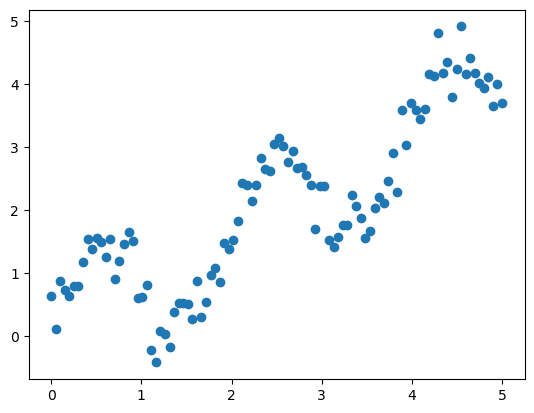

In [3]:
plt.scatter(x,y)

#### nonlinear

In [3]:
regr_lin = LinearRegression()

In [4]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [5]:
regr_lin.fit(X,y)

LinearRegression()

0.5043812085154408


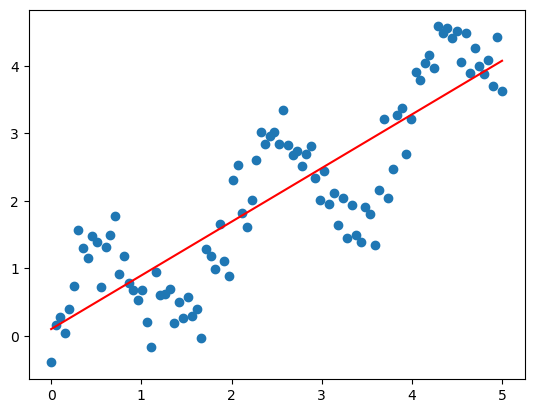

In [6]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [7]:
print(x.shape)

(100,)


In [8]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [9]:
regr_poly = LinearRegression()

In [10]:
regr_poly.fit(X_poly, y)

LinearRegression()

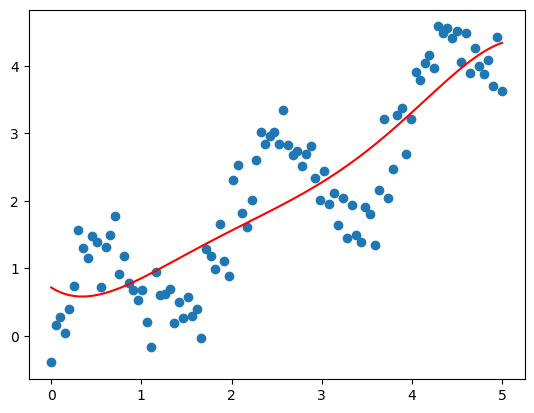

In [11]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [12]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.85969558  1.60315334 -0.75759096  0.16356831 -0.01269913]
interception:  0.7158712009590507


In [13]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.7158712 , 0.67644495, 0.64462642, 0.61986769, 0.6016454 ,
       0.58946025, 0.58283645, 0.58132126, 0.58448446, 0.5919179 ,
       0.60323493, 0.61806996, 0.63607793, 0.65693379, 0.68033206,
       0.70598627, 0.73362847, 0.76300877, 0.79389478, 0.82607117,
       0.8593391 , 0.8935158 , 0.92843398, 0.96394142, 0.99990039,
       1.03618721, 1.07269172, 1.10931675, 1.1459777 , 1.18260196,
       1.21912845, 1.2555071 , 1.29169839, 1.32767277, 1.36341025,
       1.39889983, 1.43413904, 1.46913343, 1.50389603, 1.53844694,
       1.57281271, 1.60702596, 1.64112478, 1.67515229, 1.70915612,
       1.74318789, 1.77730275, 1.81155886, 1.84601686, 1.88073942,
       1.91579072, 1.95123591, 1.98714068, 2.0235707 , 2.06059117,
       2.09826625, 2.13665864, 2.17582901, 2.21583556, 2.25673345,
       2.29857438, 2.34140601, 2.38527151, 2.43020906, 2.47625131,
       2.52342492, 2.57175004, 2.62123981, 2.67189986, 2.72372782,
       2.77671279, 2.83083488, 2.88606469, 2.94236278, 2.99967

In [14]:
regr_poly.predict(X_poly)

array([0.7158712 , 0.67644495, 0.64462642, 0.61986769, 0.6016454 ,
       0.58946025, 0.58283645, 0.58132126, 0.58448446, 0.5919179 ,
       0.60323493, 0.61806996, 0.63607793, 0.65693379, 0.68033206,
       0.70598627, 0.73362847, 0.76300877, 0.79389478, 0.82607117,
       0.8593391 , 0.8935158 , 0.92843398, 0.96394142, 0.99990039,
       1.03618721, 1.07269172, 1.10931675, 1.1459777 , 1.18260196,
       1.21912845, 1.2555071 , 1.29169839, 1.32767277, 1.36341025,
       1.39889983, 1.43413904, 1.46913343, 1.50389603, 1.53844694,
       1.57281271, 1.60702596, 1.64112478, 1.67515229, 1.70915612,
       1.74318789, 1.77730275, 1.81155886, 1.84601686, 1.88073942,
       1.91579072, 1.95123591, 1.98714068, 2.0235707 , 2.06059117,
       2.09826625, 2.13665864, 2.17582901, 2.21583556, 2.25673345,
       2.29857438, 2.34140601, 2.38527151, 2.43020906, 2.47625131,
       2.52342492, 2.57175004, 2.62123981, 2.67189986, 2.72372782,
       2.77671279, 2.83083488, 2.88606469, 2.94236278, 2.99967

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [15]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [16]:
sigma = 0.3

In [17]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [18]:
regr_rbf = LinearRegression()

In [19]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

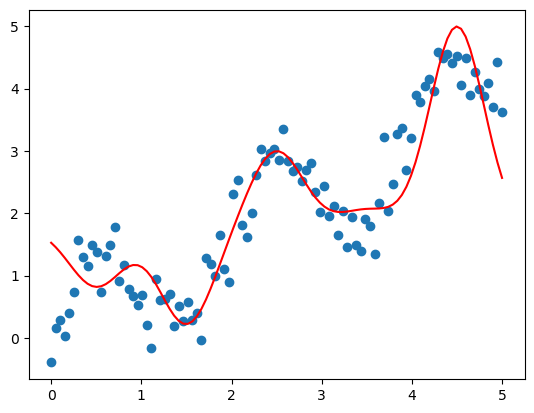

In [20]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [21]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.93672005 -1.54097107  1.24226242  0.29333604  3.23819339]
interception:  1.7597163215149596


#### Comparison

In [22]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

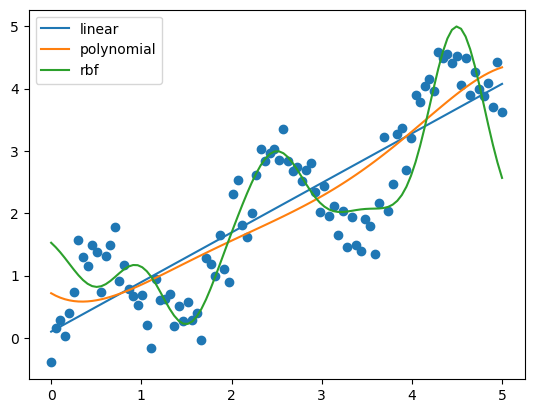

In [23]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [24]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5043812085154408


In [25]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.46737983777888636


In [26]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.3363667861035649
